<a href="https://colab.research.google.com/github/ihsantri04/5311422139_Ihsan-Tri-Nugroho/blob/main/5311422139_Ihsan_Tri_N_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Pembuatan ANN mengenai Prediksi Harga Mobil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Bahasa Pemrograman Phyton ini menggunakan Numpy, pandas, matplotlib.pylot, seaborn.
Numpy atau Numerical Python adalah library Python yang fokus pada scientific computing, pada numpy ini untuk membuat array.
Pandas atau Python for Data Analysis adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. pandas melakukan reshape, slice dan dice, agregasi data, dan mengakses subset dari data.
Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik.

In [22]:
df = pd.read_csv('car_purchasing (1).csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


pada line pertama untuk membaca file CSV dari penyimpanan Google Drive dengan nama 'car_purchasing (1).csv' dan menyimpan datanya ke dalam variabel df.
pada line kedua untuk menampilkan lima baris pertama dari dataframe df.

In [23]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


pada line pertama untuk menghapus kolom nama pelanggan, email pelanggan, negara dan jenis kelamin.
pada line kedua untuk menampilkan lima baris pertama dari dataframe df setelah penghapusan kolom.

In [24]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

pada line pertama untuk menampilkan informasi umum tentang dataframe df.
pada line kedua untuk menghitung jumlah nilai kosong (NaN) di setiap kolom dataframe df.


Text(0.5, 1.0, 'Korelasi antara Hutang kartu kredit dan Gaji tahunan')

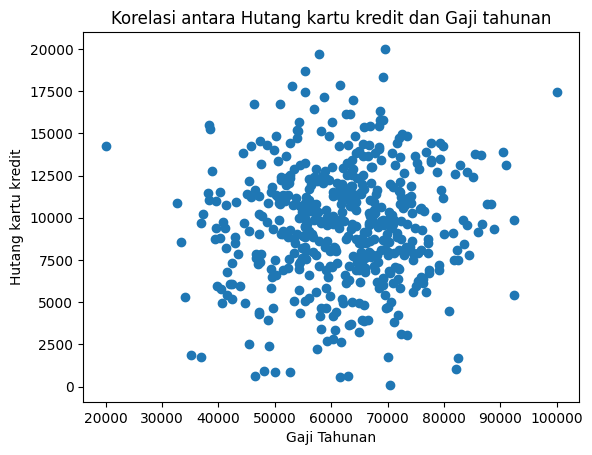

In [27]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('Gaji Tahunan')
plt.ylabel('Hutang kartu kredit')
plt.title('Korelasi antara Hutang kartu kredit dan Gaji tahunan')

pada line pertama membuat kurva pada sumbu x yaitu annual Salary dan sumbu y yaitu credit card debt.
pada line kedua dan ketiga menambahkan label pada setiap sumbu nya.
line keempat untuk menampilkan teks judul pada kurva
line kelima untuk menampilkan gambar kurva

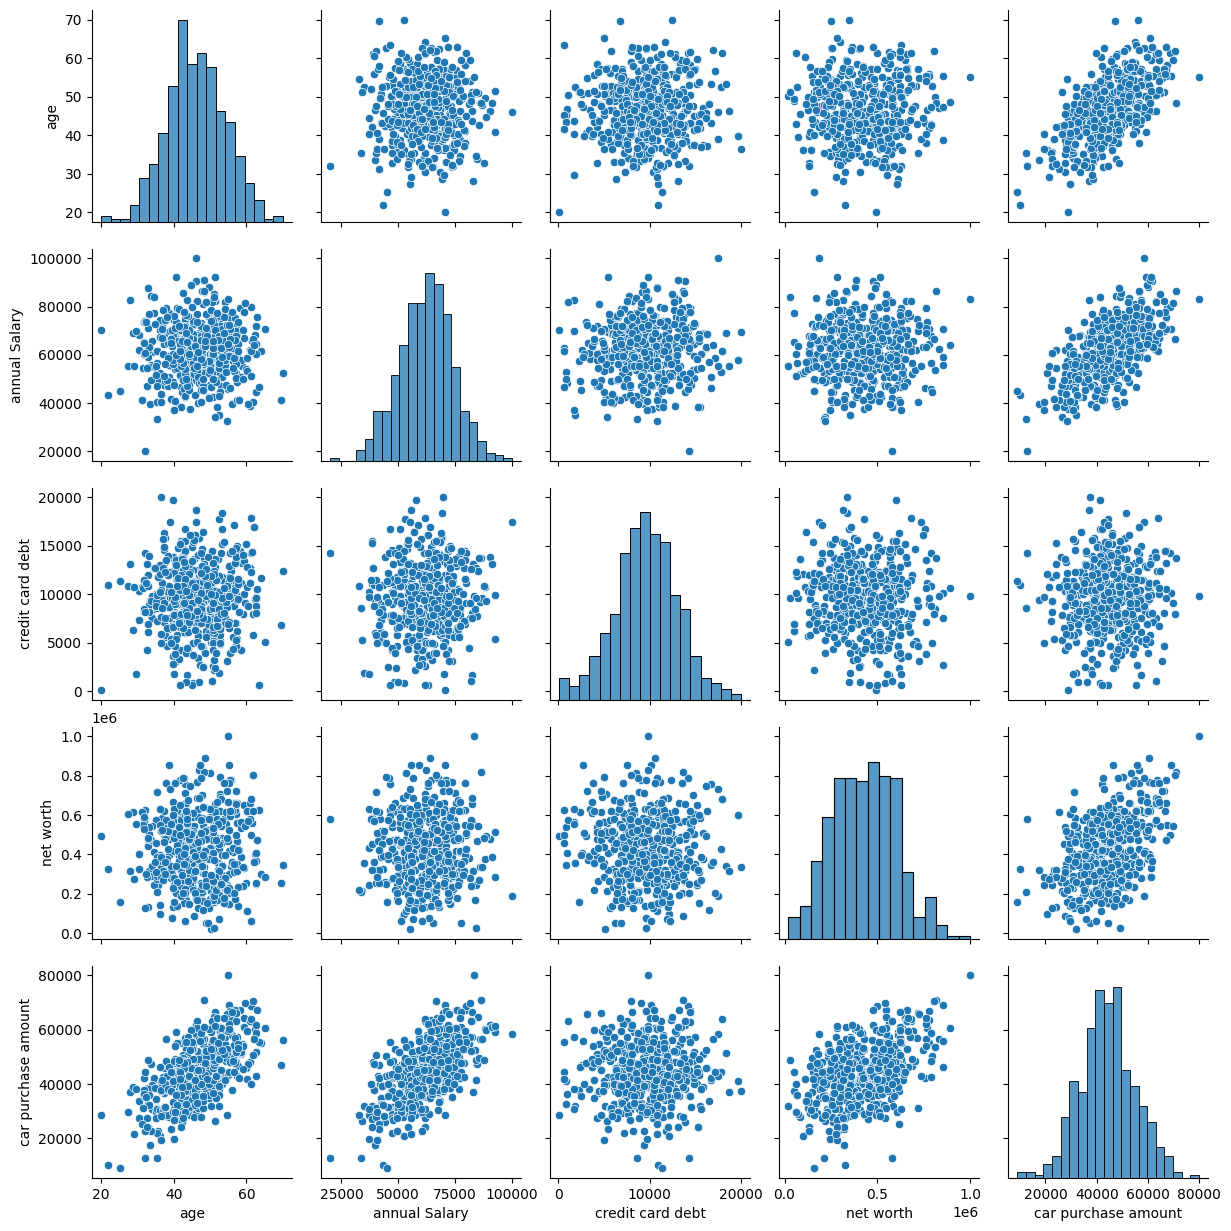

In [28]:
sns.pairplot(df)

menampilkan kurva tiap kolom

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

line pertama program MinMaxScaler untuk penskalaan fitur, sehingga mereka memiliki rentang antara 0 dan 1.
line kedua Penskalaan fitur X menggunakan MinMaxScaler.
line ketiga penskalaan target y menggunakan MinMaxScaler setelah diubah menjadi bentuk matriks.
line keempat pembagian dataset menjadi set pelatihan dan pengujian dengan ukuran pengujian.


In [31]:
#Percobaan Regresi Linear
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999814550392
Test score 0.99999997994636


Membuat objek Regresi Linear, digunakan untuk melatih dan menguji data.
melatih model regresi linear menggunakan set pelatihan dengan dua parameter.
menampilkan skor pelatihan (train score).
menampilkan skor pengujian (test score).


In [32]:
y_pred = lreg.predict(X_test)

In [34]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 27ms/step - loss: 0.1670 - mean_absolute_error: 0.3756 - val_loss: 0.1107 - val_mean_absolute_error: 0.2900
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0846 - mean_absolute_error: 0.2525 - val_loss: 0.0533 - val_mean_absolute_error: 0.1817
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0382 - mean_absolute_error: 0.1568 - val_loss: 0.0288 - val_mean_absolute_error: 0.1326
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.1199 - val_loss: 0.0244 - val_mean_absolute_error: 0.1216
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.1143 - val_loss: 0.0241 - val_mean_absolute_error: 0.1204
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.1119 - val_loss: 0.0217 - val_mean_absolute_error: 0.1141
Epoch 7/50
10/10 [=========

Membuat model sequential neural network.
Mengompilasi model dengan konfigurasi optimizer, loss function, dan metrik.
Melatih model dengan data pelatihan dan menyimpan riwayat pelatihan.

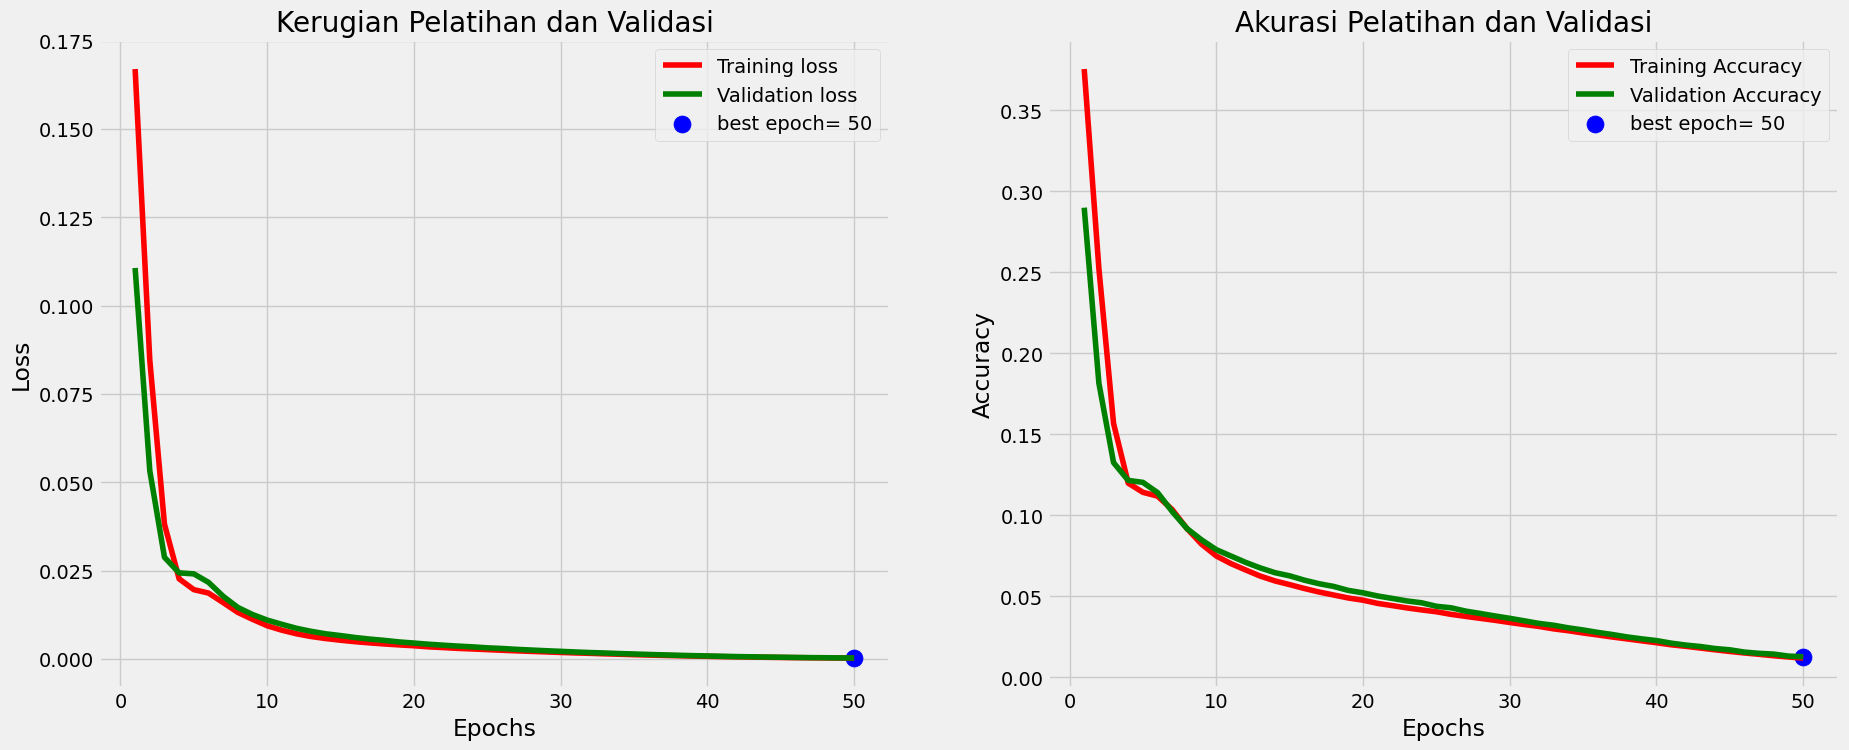

In [36]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Kerugian Pelatihan dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

membuat grafik kurva, menjadi 2 yaitu kerugian pelatihan dan variasi, lalu akurasi pelatihan dan validasi. dengan best epochs 50

In [37]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [38]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.99999997994636


In [39]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.6482e-04 - mean_absolute_error: 0.0128


[0.00036481779534369707, 0.012773917056620121]

In [40]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 33ms/step


array([[221388.78]], dtype=float32)

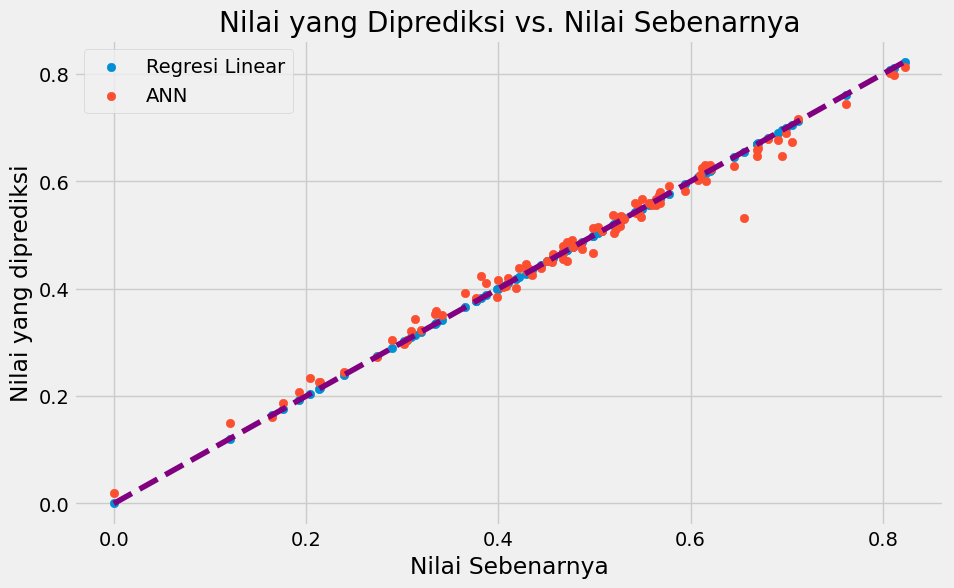

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Regresi Linear')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='purple')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai yang diprediksi')
plt.title('Nilai yang Diprediksi vs. Nilai Sebenarnya')
plt.legend()
plt.show()

menampilkan nilai yang diprediksi dengan nilai sebenarnya. menampilkan Regresi Nilai dan ANN